In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
f = h5py.File('minosmatch_nukecczdefs_127x68_xuv_padded_me1Bmc.hdf5', 'r')

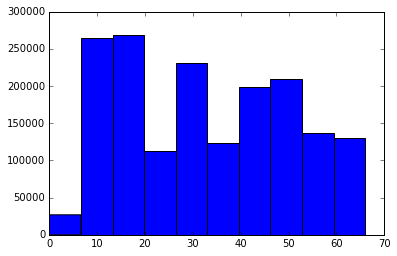

In [3]:
n, bins, patches = plt.hist(f['planecodes'])

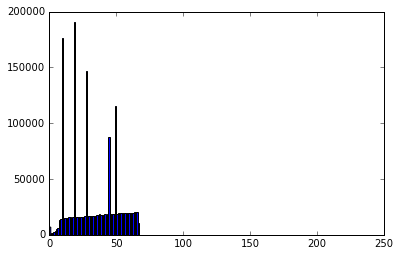

In [4]:
_, _, _ = plt.hist(f['planecodes'], bins=214, range=(0, 214))

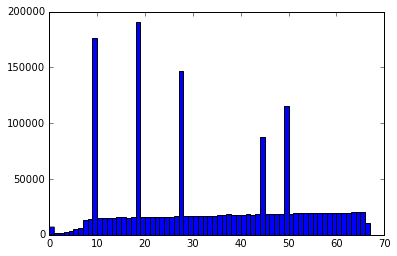

In [5]:
n, bins, patches = plt.hist(f['planecodes'], bins=np.arange(71))

In [6]:
planes = np.zeros(np.shape(f['planecodes']))
f['planecodes'].read_direct(planes)

(array([   6877.,    1520.,    1757.,    2109.,    3177.,    5106.,
           6326.,   13125.,   14114.,  176750.,   14952.,   15197.,
          15019.,   15454.,   15509.,   15595.,   15190.,   15735.,
         190904.,   16139.,   15661.,   15937.,   16190.,   16099.,
          16191.,   16366.,   16495.,  146343.,   16598.,   16799.,
          16772.,   17083.,   16930.,   16875.,   16833.,   17438.,
          17669.,   18194.,   18052.,   18083.,   17905.,   18317.,
          18171.,   18473.,   87884.,   18677.,   18695.,   18793.,
          18907.,  115138.,   18846.,   19142.,   19213.,   19262.,
          19509.,   19522.,   19448.,   19544.,   19447.,   19677.,
          19599.,   19758.,   19500.,   20288.,   20232.,   20185.,
          10144.,       0.,       0.,       0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44

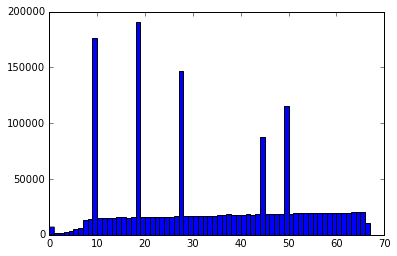

In [7]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

70
71


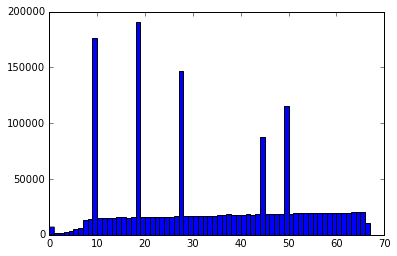

In [8]:
n, bins, _ = plt.hist(planes[planes < 70], bins=np.arange(71))
print len(n)
print len(bins)

In [9]:
print any(planes == 67)

False


In [10]:
print any(planes > 66)

False


In [11]:
print any(planes < 0)

False


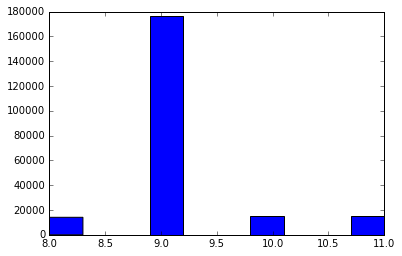

In [12]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

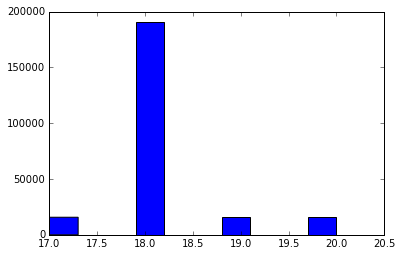

In [13]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

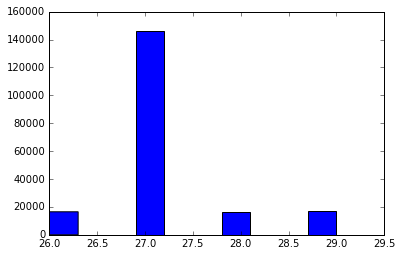

In [14]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

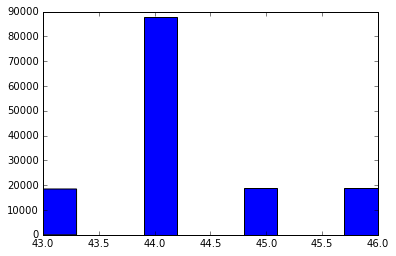

In [15]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

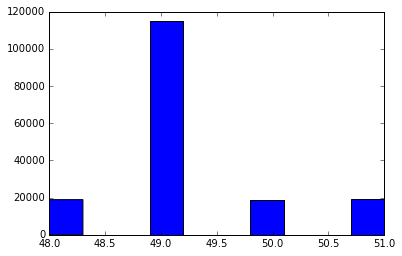

In [16]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [17]:
segments = np.zeros(np.shape(f['segments']))
f['segments'].read_direct(segments)

(array([  40958.,  219502.,  236782.,  194473.,  141694.,  182229.,
          78408.,   82530.,  230250.,   20864.,  273749.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

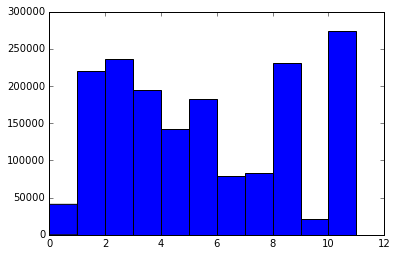

In [18]:
plt.hist(segments, bins=np.arange(12))

In [19]:
print np.min(planes)
print np.max(planes)

0.0
66.0
